# Some Teams One Dream
Hand checking NBA teams from the 2014-2018 seasons

In [1]:
#acquire libraries
import pandas as pd

#explore libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from prepare import wrangle_nba, scaled_wrangle_nba

#model libraries
from model import logistic_regression, decision_tree, random_forest, kneighbors, logistic_regression_validate, decision_tree_validate, random_forest_validate, kneighbors_validate


import warnings
warnings.filterwarnings("ignore")

## Acquire

In [2]:
#uploading the nba csv and saving it as a dataframe called nba
nba = pd.read_csv('nba.games.stats.csv')

### Initial analysis of the data

In [3]:
#sneak peak into the data
nba.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [4]:
#checking to see how many rows and columns there are
nba.shape

(9840, 41)

In [5]:
#checking data types, null values, and column names
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                9840 non-null   int64  
 1   Team                      9840 non-null   object 
 2   Game                      9840 non-null   int64  
 3   Date                      9840 non-null   object 
 4   Home                      9840 non-null   object 
 5   Opponent                  9840 non-null   object 
 6   WINorLOSS                 9840 non-null   object 
 7   TeamPoints                9840 non-null   int64  
 8   OpponentPoints            9840 non-null   int64  
 9   FieldGoals                9840 non-null   int64  
 10  FieldGoalsAttempted       9840 non-null   int64  
 11  FieldGoals.               9840 non-null   float64
 12  X3PointShots              9840 non-null   int64  
 13  X3PointShotsAttempted     9840 non-null   int64  
 14  X3PointS

In [6]:
#looking at the summary statistics of all the numeric columns
nba.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9840.0,11960.157012,18654.867508,1.000,2537.750,5141.500,7715.250,82119.000
Game,9840.0,41.500000,23.670804,1.000,21.000,41.500,62.000,82.000
TeamPoints,9840.0,103.652337,12.188043,64.000,95.000,103.000,112.000,149.000
OpponentPoints,9840.0,103.652337,12.188043,64.000,95.000,103.000,112.000,149.000
FieldGoals,9840.0,38.602439,5.029992,19.000,35.000,38.000,42.000,58.000
FieldGoalsAttempted,9840.0,84.902439,7.130043,60.000,80.000,85.000,89.000,129.000
FieldGoals.,9840.0,0.455689,0.054711,0.271,0.418,0.455,0.494,0.684
X3PointShots,9840.0,9.126829,3.598084,0.000,7.000,9.000,11.000,25.000
X3PointShotsAttempted,9840.0,25.623679,7.102501,4.000,21.000,25.000,30.000,61.000
X3PointShots.,9840.0,0.354321,0.097782,0.000,0.290,0.353,0.419,0.750


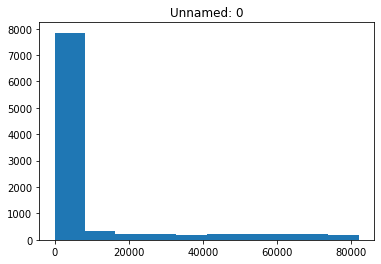

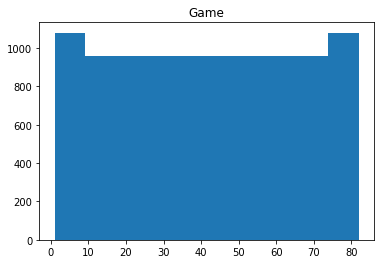

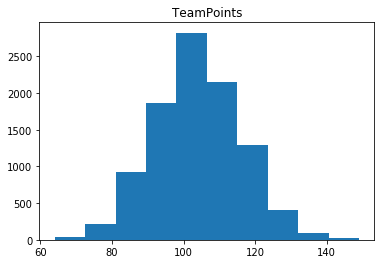

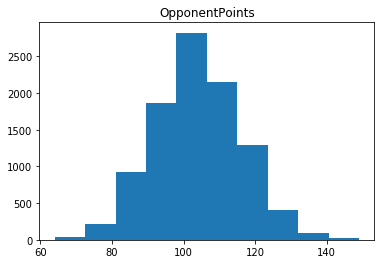

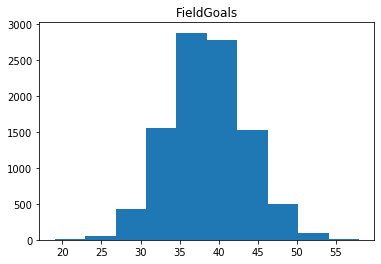

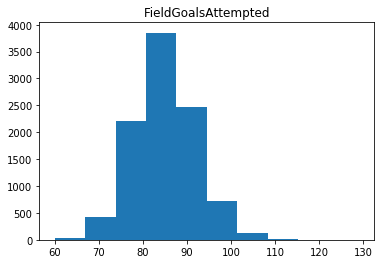

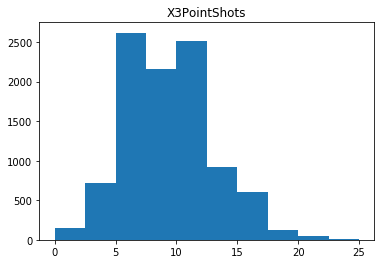

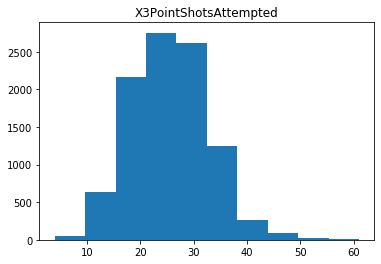

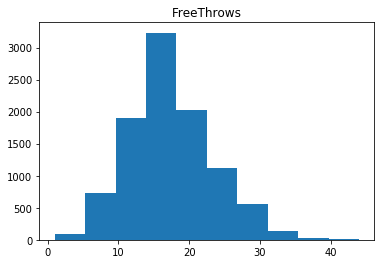

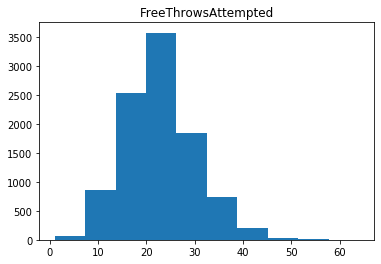

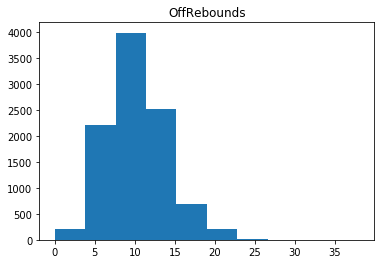

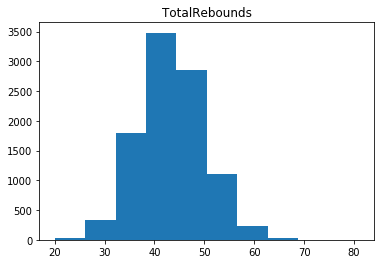

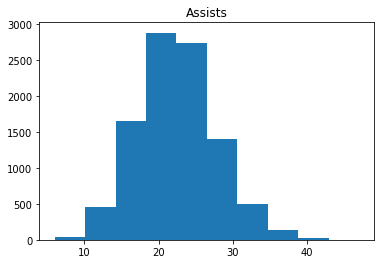

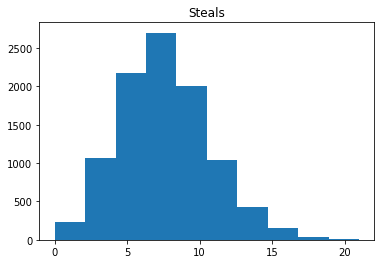

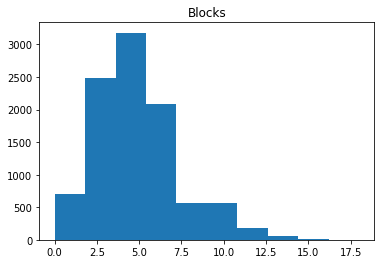

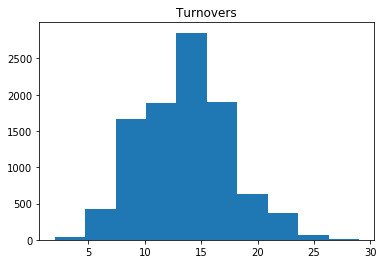

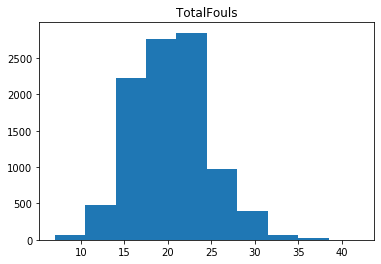

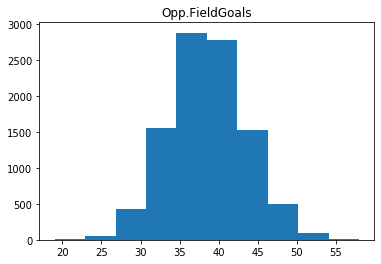

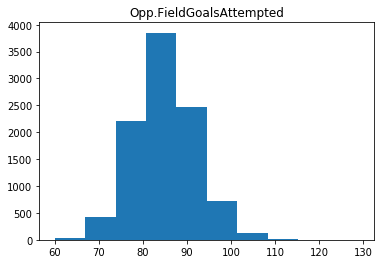

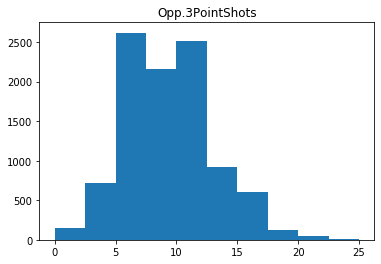

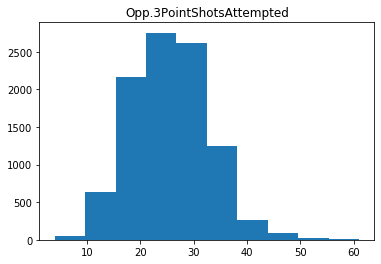

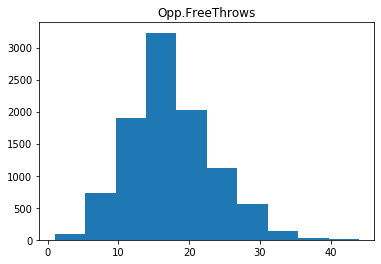

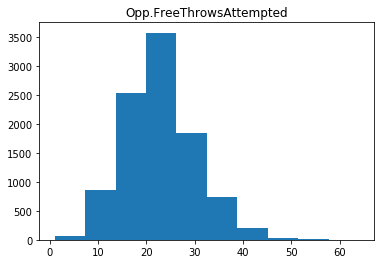

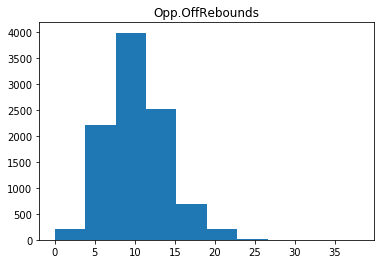

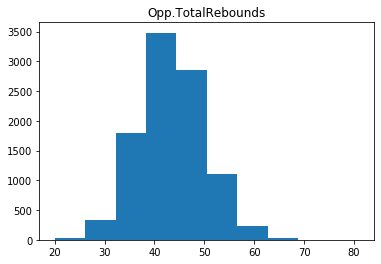

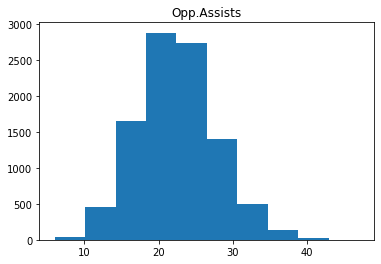

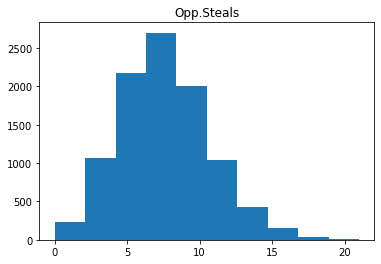

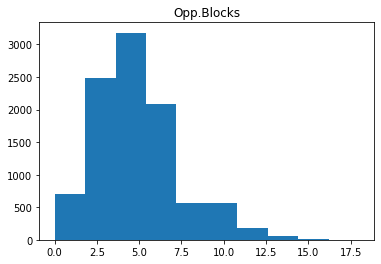

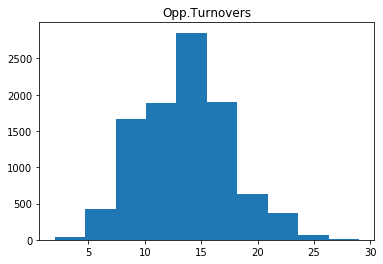

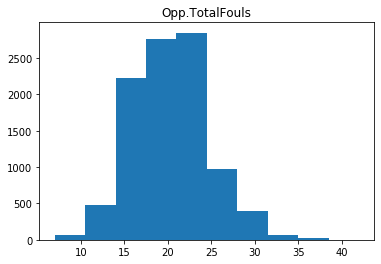

In [7]:
num_cols = nba.columns[[nba[col].dtype == 'int64' for col in nba.columns]]
for col in num_cols:
    plt.hist(nba[col])
    plt.title(col)
    plt.show()

<div class="alert alert-block alert-info">
    
- We will delete unnamed column because it wont be necessary
- We won't need game number because it will be in the index
- Four seasons worth of data, we could look into splitting up the seasons
- No null values, BIG PLUS!
- Some outliers but its just a part of the game. Will keep all the data but could consider removing the outliers later
- Normal distribution for all of the numerical columns
</div>

_____

## Prepare

<div class="alert alert-block alert-info">
    
- adding two columns called home_is_west and away_is_west for teams playing in different conferences
- Changed Home, Conference, Opp.Conference and Wins into dummy variables
- dropped dates and columns that deal with point totals to not skew the models to predict who wins
- split into train, validate and test
</div>

____

## Explore

In [8]:
train, validate, test = wrangle_nba()

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5510 entries, 7641 to 7822
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               5510 non-null   object 
 1   Opponent           5510 non-null   object 
 2   FieldGoals.        5510 non-null   float64
 3   X3PointShots.      5510 non-null   float64
 4   FreeThrows.        5510 non-null   float64
 5   OffRebounds        5510 non-null   int64  
 6   TotalRebounds      5510 non-null   int64  
 7   Assists            5510 non-null   int64  
 8   Steals             5510 non-null   int64  
 9   Blocks             5510 non-null   int64  
 10  Turnovers          5510 non-null   int64  
 11  TotalFouls         5510 non-null   int64  
 12  Opp.FieldGoals.    5510 non-null   float64
 13  Opp.3PointShots.   5510 non-null   float64
 14  Opp.FreeThrows.    5510 non-null   float64
 15  Opp.OffRebounds    5510 non-null   int64  
 16  Opp.TotalRebounds  55

In [9]:
train.shape, validate.shape, test.shape

((5510, 26), (2362, 26), (1968, 26))

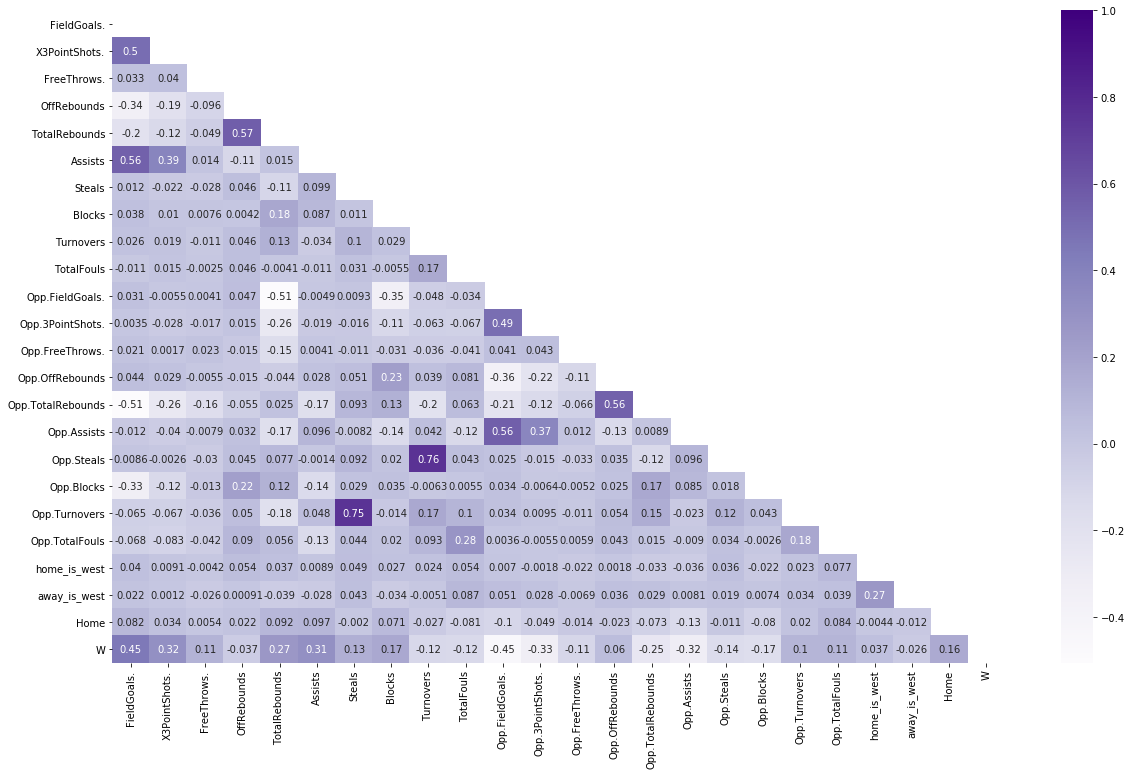

In [10]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), cmap='Purples', annot=True, mask=mask)
plt.show()

- fieldgoal%, assist, 3point% and totalrebounds have the highest positive correlation
- oppfieldgoal%, oppassist, opp3point% and opptotalrebounds have lowest negative correlation
- offrebounds, oppoffrebounds, homeiswest and awayiswest seem to have no correlation
- Let's test and see if there is a significant difference in the features that are the "middle of the pack" correlation
    - `FreeThrows.`
    - `OffRebounds`
    - `Turnovers`
    - `TotalFouls`
    - `Home`

___

### Is there a relationship between wins and home games?

- **$H_0$:** There is no dependence between wins and home games
- **$H_a$:** There is a dependence between wins and home games

In [11]:
alpha = 0.01

In [12]:
observed = pd.crosstab(train.W, train.Home)

In [13]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [14]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


4.001906157687878e-33

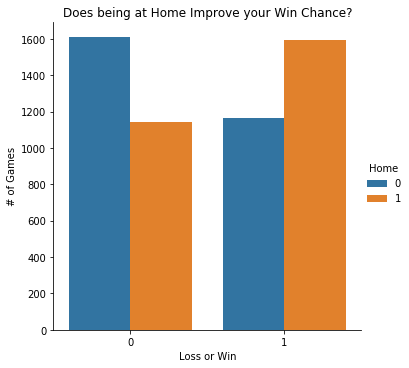

In [15]:
sns.catplot(x="W", hue="Home", kind="count", data=train)
plt.title('Does being at Home Improve your Win Chance?')
plt.ylabel('# of Games')
plt.xlabel('Loss or Win')
plt.show()

In [16]:
print(train[train.W == 1].Home.value_counts())
print("The ratio of wins to losses at Home is", 1591/(1591+1164))

1    1591
0    1164
Name: Home, dtype: int64
The ratio of wins to losses at Home is 0.5774954627949184


In [17]:
print(train[train.W == 0].Home.value_counts())
print("The ratio of wins to losses Away is", 1145/(1145+1610))

0    1610
1    1145
Name: Home, dtype: int64
The ratio of wins to losses Away is 0.41560798548094374


#### Takeaways:
- The difference between 58% and 42% is pretty significant in regards to win percentage
- The evidence suggest that wins and being at home have some sort of relationship/dependence. 

___

### Do winning teams have the same number of turnovers as losing teams?

- **$H_0$:** Win or Lose teams have the same number of turnovers
- **$H_a$:** Win or Lose teams do not have the same number of turnovers.

In [18]:
win = train[train.W == 1]
lose = train[train.W == 0]

t, p = stats.ttest_ind(win['Turnovers'], lose['Turnovers'])

In [19]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


4.54985278617686e-18

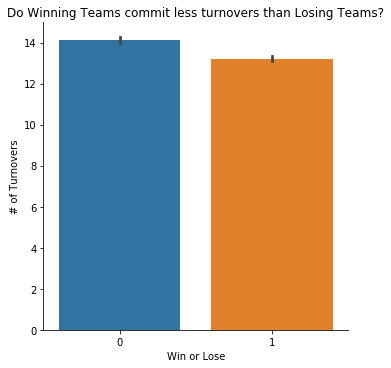

In [20]:
sns.catplot(x="W", y="Turnovers", kind="bar", data=train)
plt.title('Do Winning Teams commit less turnovers than Losing Teams?')
plt.xlabel('Win or Lose')
plt.ylabel('# of Turnovers')
plt.show()

In [21]:
print("The average number of turnovers for winning teams is", round(win['Turnovers'].mean(),3))

The average number of turnovers for winning teams is 13.216


In [22]:
print("The average number of turnovers for losing teams is", round(lose['Turnovers'].mean(),3))

The average number of turnovers for losing teams is 14.123


#### Takeaways:
- On average, winning teams commit one less turnover than losing teams
- Depending on how close games are, that turnover could be a 5-6 point swing in either direction
- The evidence suggest there is a significant difference in the 1 turnover difference

___

### Do winning teams have the same number of fouls as losing teams?

- **$H_0$:** Win or Lose teams have the same number of fouls
- **$H_a$:** Win or Lose teams do not have the same number of fouls.

In [23]:
t, p = stats.ttest_ind(win['TotalFouls'], lose['TotalFouls'])

In [24]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


5.74318331387638e-20

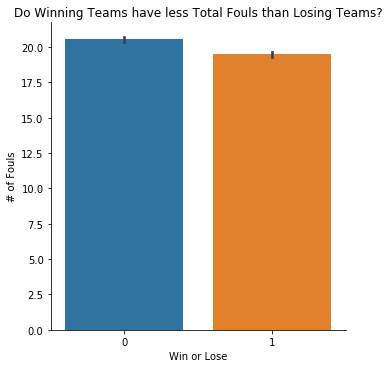

In [25]:
sns.catplot(x="W", y="TotalFouls", kind="bar", data=train)
plt.title('Do Winning Teams have less Total Fouls than Losing Teams?')
plt.xlabel('Win or Lose')
plt.ylabel('# of Fouls')
plt.show()

In [26]:
print("The average number of total fouls for winning teams is", round(win['TotalFouls'].mean(),3))

The average number of total fouls for winning teams is 19.472


In [27]:
print("The average number of total fouls for losing teams is", round(lose['TotalFouls'].mean(),3))

The average number of total fouls for losing teams is 20.539


#### Takeaways:
- On average, winning teams commit one less foul than losing teams
- Some fouls are good fouls, preventing easy point to be scored and some fouls could end up in a 3-4 point play
- The evidence suggest there is a significant difference in the 1 foul difference
- Could that mean free throws make that much of a difference. 

___

### Do winning teams have the same free throw percentage as losing teams?

- **$H_0$:** Win or Lose teams shoot the same percentage of free throws
- **$H_a$:** Win or Lose teams do not shoot the same percentage of free throws

In [28]:
t, p = stats.ttest_ind(win['FreeThrows.'], lose['FreeThrows.'])

In [29]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


3.7351428118864475e-17

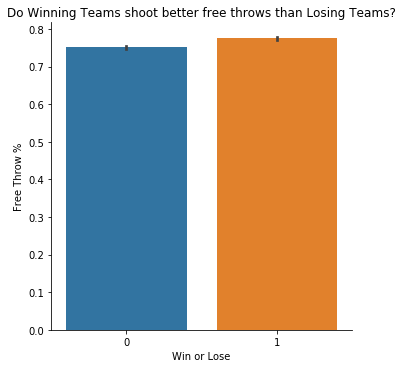

In [30]:
sns.catplot(x="W", y="FreeThrows.", kind="bar", data=train)
plt.title('Do Winning Teams shoot better free throws than Losing Teams?')
plt.xlabel('Win or Lose')
plt.ylabel('Free Throw %')
plt.show()

In [31]:
print("The average rate of free throw makes for winning teams is", round(win['FreeThrows.'].mean(),3))

The average rate of free throw makes for winning teams is 0.775


In [32]:
print("The average rate of free throw makes for losing teams is", round(lose['FreeThrows.'].mean(),3))

The average rate of free throw makes for losing teams is 0.752


#### Takeaways:
- The difference between 78% and 75% seems almost too small to matter
    - The statistical testing suggest otherwise
- Winning teams do shoot slightly better
    - maybe the few points is the difference to win a game
- The evidence suggest there is a significant difference in free throw percentage between winning and losing teams

___

### Do winning teams have the same number of offensive rebounds as losing teams?

- **$H_0$:** Win or Lose teams have the same number of offensive rebounds
- **$H_a$:** Win or Lose teams do not have the same number of offensive rebounds.

In [33]:
t, p = stats.ttest_ind(win['OffRebounds'], lose['OffRebounds'])

In [34]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


0.005496648630213486

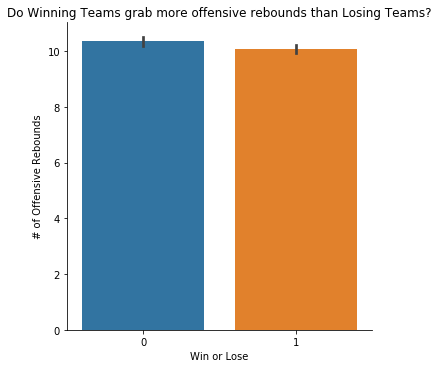

In [35]:
sns.catplot(x="W", y="OffRebounds", kind="bar", data=train)
plt.title('Do Winning Teams grab more offensive rebounds than Losing Teams?')
plt.xlabel('Win or Lose')
plt.ylabel('# of Offensive Rebounds')
plt.show()

In [36]:
print("The average rate for offensive rebounds of winning teams is", round(win['OffRebounds'].mean(),3))

The average rate for offensive rebounds of winning teams is 10.061


In [37]:
print("The average rate for offensive rebounds of winning teams is", round(lose['OffRebounds'].mean(),3))

The average rate for offensive rebounds of winning teams is 10.347


#### Takeaways:
- The difference between 10.1 and 10.3% seems almost too small to matter
    - The statistical testing suggest otherwise
- Oddly enough, losing teams grab more offensive rebounds than winning teams
    - maybe because they are missing more shots?
- The evidence suggest there is a significant difference of offensive rebounds for winning and losing teams

___

### Summary of Exploration

<div class="alert alert-block alert-info">
    
- After some statistical testing, the data shows that there is
    - a relationship between Home games and Wins
    - a significant difference between Wins and
        - Turnovers
        - Fouls
        - Free Throw Percentage
        - Offensive Rebounds
</div>

___

# Model 

We will import a function similar to the Prepare stage above except this function scales the data so we can obtain more accurate models and not have one feature have more influence than the others simply because it contains larger numbers

In [38]:
train_scaled, validate_scaled, test_scaled = scaled_wrangle_nba()

## Train

In [39]:
X_train = train_scaled.drop(columns = ['Team', 'Opponent', 'W'])
y_train = train_scaled.W

- On the first model we are going to try all the variables and see which have the most influence on the model
- Dropping the categorical variables `Team` and `Opponent`

### Setting the Baseline

In [40]:
train_scaled['baseline'] = train_scaled.W.value_counts().index[0]

In [41]:
baseline_accuracy = (train_scaled.baseline == train_scaled.W).mean()
print(f" The baseline accuracy will be {baseline_accuracy}")

 The baseline accuracy will be 0.5


### Model 1

In [42]:
coeff, cm, class_report = logistic_regression(X_train, y_train)

In [43]:
coeff.T

,0
home_is_west,0.101605
away_is_west,-0.034740
Home,0.179915
FieldGoals._scaled,11.588874
X3PointShots._scaled,4.834567
FreeThrows._scaled,3.101893
OffRebounds_scaled,1.774434
TotalRebounds_scaled,6.729991
Assists_scaled,2.718055
Steals_scaled,1.682658


In [44]:
cm

,0,1
0,2577,178
1,172,2583


In [45]:
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.937432,0.935531,0.936479,0.936481,0.936481
recall,0.935390,0.937568,0.936479,0.936479,0.936479
f1-score,0.936410,0.936548,0.936479,0.936479,0.936479
support,2755.000000,2755.000000,0.936479,5510.000000,5510.000000


<div class="alert alert-block alert-info">
    
- Model 1 performed way above the baseline average but it was with all the features
    
- Let's pull out the features with the most influence i.e. abs(coeff) > 5
    - `FieldGoals.` & `Opp.FieldGoals.`
    - `TotalRebounds` & `Opp.TotalRebounds.`
    - `Turnovers` & `Opp.Turnovers`
    - `TotalFouls` & `Opp.TotalFouls`
</div>

### Model 2 - Logistic Regression

In [46]:
X_train2 = train_scaled[['FieldGoals._scaled', 'Opp.FieldGoals._scaled', 'TotalRebounds_scaled', 'Opp.TotalRebounds_scaled', 'Turnovers_scaled', 'Opp.Turnovers_scaled', 'TotalFouls_scaled', 'Opp.TotalFouls_scaled']]
y_train2 = train_scaled.W

In [47]:
coeff2, cm2, class_report2 = logistic_regression(X_train2, y_train2)

In [48]:
coeff2.T

,0
FieldGoals._scaled,12.757818
Opp.FieldGoals._scaled,-12.429221
TotalRebounds_scaled,7.399879
Opp.TotalRebounds_scaled,-6.998543
Turnovers_scaled,-6.408212
Opp.Turnovers_scaled,6.231019
TotalFouls_scaled,-3.952367
Opp.TotalFouls_scaled,4.038418
intercept,-0.464362


In [49]:
cm2

,0,1
0,2464,291
1,279,2476


In [50]:
class_report2

,0,1,accuracy,macro avg,weighted avg
precision,0.898287,0.894832,0.896552,0.896559,0.896559
recall,0.894374,0.898730,0.896552,0.896552,0.896552
f1-score,0.896326,0.896777,0.896552,0.896551,0.896551
support,2755.000000,2755.000000,0.896552,5510.000000,5510.000000


### Model 3 - Decision Tree

In [51]:
cm3, class_report3 = decision_tree(X_train2, y_train2, 3)

In [52]:
cm3

,0,1
0,2094,661
1,495,2260


In [53]:
class_report3

,0,1,accuracy,macro avg,weighted avg
precision,0.808806,0.773708,0.7902,0.791257,0.791257
recall,0.760073,0.820327,0.7902,0.790200,0.790200
f1-score,0.783683,0.796335,0.7902,0.790009,0.790009
support,2755.000000,2755.000000,0.7902,5510.000000,5510.000000


### Model 4 - Decision Tree

In [54]:
cm4, class_report4 = decision_tree(X_train2, y_train2, 5)

In [55]:
cm4

,0,1
0,2145,610
1,360,2395


In [56]:
class_report4

,0,1,accuracy,macro avg,weighted avg
precision,0.856287,0.797005,0.823956,0.826646,0.826646
recall,0.778584,0.869328,0.823956,0.823956,0.823956
f1-score,0.815589,0.831597,0.823956,0.823593,0.823593
support,2755.000000,2755.000000,0.823956,5510.000000,5510.000000


### Model 5 - Random Forest

In [57]:
cm5, class_report5 = random_forest(X_train2, y_train2, 500, 3)

In [58]:
cm5

,0,1
0,2323,432
1,564,2191


In [59]:
class_report5

,0,1,accuracy,macro avg,weighted avg
precision,0.804641,0.835303,0.819238,0.819972,0.819972
recall,0.843194,0.795281,0.819238,0.819238,0.819238
f1-score,0.823467,0.814801,0.819238,0.819134,0.819134
support,2755.000000,2755.000000,0.819238,5510.000000,5510.000000


### Model 6 - Random Forest

In [60]:
cm6, class_report6 = random_forest(X_train2, y_train2, 100, 6)

In [61]:
cm6

,0,1
0,2364,391
1,375,2380


In [62]:
class_report6

,0,1,accuracy,macro avg,weighted avg
precision,0.863089,0.858896,0.86098,0.860992,0.860992
recall,0.858076,0.863884,0.86098,0.860980,0.860980
f1-score,0.860575,0.861383,0.86098,0.860979,0.860979
support,2755.000000,2755.000000,0.86098,5510.000000,5510.000000


### Model 7 - K-Nearest Neighbor

In [63]:
cm7, class_report7 = kneighbors(X_train2, y_train2, 3)

In [64]:
cm7

,0,1
0,2550,205
1,211,2544


In [65]:
class_report7

,0,1,accuracy,macro avg,weighted avg
precision,0.923578,0.925427,0.924501,0.924503,0.924503
recall,0.925590,0.923412,0.924501,0.924501,0.924501
f1-score,0.924583,0.924419,0.924501,0.924501,0.924501
support,2755.000000,2755.000000,0.924501,5510.000000,5510.000000


#### Results
| | Accuracy-Train | 
| --- | --- |
| Model 1: | .9365 |
| Model 2: | .8966 |
| Model 3: | .7902 |
| Model 4: | .8240 |
| Model 5: | .8192 |
| Model 6: | .8610 |
| Model 7: | .9245 |

<div class="alert alert-block alert-info">
    
- Model 1 included all the features so we won't move forward with it but it gives us a goal to shoot for in terms of accuracy
- Model 2's accuracy dropped by 4 percentage points in comparison to Model 1. 
    - This is to be expected because we gave the model less data to work with
- For Model 3 & 4 we used a decision tree with different max depths
    - Neither has performed better than the linear regression
    - Will check accuracy further with validate to make sure we did not overfit
    - prone to happen when we give more depth to the decision tree
- Model 5 & 6 use random forest with different max depths and minimum sampling
    - Model 6 did not do much better and with fear of overfitting, we will only move forward with model 5
    - both seem unlikely to move into test stage anyways
- Model 7 has done the best so far with the chosen features
    - definitely will keep a close eye on this one. Kneighbors is known to overfit
- We will take one model from each algorithm and move forward to the validate stage
    - model 2
    - model 4
    - model 5
    - model 7
</div>

## Validate

In [66]:
X_validate = validate_scaled[['FieldGoals._scaled', 'Opp.FieldGoals._scaled', 'TotalRebounds_scaled', 'Opp.TotalRebounds_scaled', 'Turnovers_scaled', 'Opp.Turnovers_scaled', 'TotalFouls_scaled', 'Opp.TotalFouls_scaled']]
y_validate = validate_scaled.W

### Model 2 - Logistic Regression

In [67]:
coeff_val2, cm_val2, class_report_val2 = logistic_regression_validate(X_train2, y_train2, X_validate, y_validate)

In [68]:
cm_val2

,0,1
0,1057,124
1,113,1068


In [69]:
class_report_val2

,0,1,accuracy,macro avg,weighted avg
precision,0.903419,0.895973,0.899661,0.899696,0.899696
recall,0.895004,0.904318,0.899661,0.899661,0.899661
f1-score,0.899192,0.900126,0.899661,0.899659,0.899659
support,1181.000000,1181.000000,0.899661,2362.000000,2362.000000


### Model 4 - Decision Tree

In [70]:
cm_val4, class_report_val4 = decision_tree_validate(X_train2, y_train2, X_validate, y_validate, 5)

In [71]:
cm_val4

,0,1
0,888,293
1,193,988


In [72]:
class_report_val4

,0,1,accuracy,macro avg,weighted avg
precision,0.821462,0.771272,0.794242,0.796367,0.796367
recall,0.751905,0.836579,0.794242,0.794242,0.794242
f1-score,0.785146,0.802600,0.794242,0.793873,0.793873
support,1181.000000,1181.000000,0.794242,2362.000000,2362.000000


### Model 5 - Random Forest

In [73]:
cm_val5, class_report_val5 = random_forest_validate(X_train2, y_train2, X_validate, y_validate, 500, 3)

In [74]:
cm_val5

,0,1
0,966,215
1,231,950


In [75]:
class_report_val5

,0,1,accuracy,macro avg,weighted avg
precision,0.807018,0.815451,0.811177,0.811234,0.811234
recall,0.817951,0.804403,0.811177,0.811177,0.811177
f1-score,0.812447,0.809889,0.811177,0.811168,0.811168
support,1181.000000,1181.000000,0.811177,2362.000000,2362.000000


### Model 7 - K-Nearest Neighbor

In [76]:
cm_val7, class_report_val7 = kneighbors_validate(X_train2, y_train2, X_validate, y_validate, 3)

In [77]:
cm_val7

,0,1
0,993,188
1,171,1010


In [78]:
class_report_val7

,0,1,accuracy,macro avg,weighted avg
precision,0.853093,0.843072,0.84801,0.848082,0.848082
recall,0.840813,0.855207,0.84801,0.848010,0.848010
f1-score,0.846908,0.849096,0.84801,0.848002,0.848002
support,1181.000000,1181.000000,0.84801,2362.000000,2362.000000


#### Results
| | Accuracy-Train | Accuracy-Validate |
| --- | --- | --- |
| Model 2: | .8966 | .8997 |
| Model 4: | .8240 | .7942 |
| Model 5: | .8192 | .8112 |
| Model 7: | .9245 | .8480 |

<div class="alert alert-block alert-info">
    
- Model 2's results are nearly identical to what we saw in the train stage
- Model 4 did worse than the train dataset and was the least accurate overall 
- Model 5 was consistent from the train to validate stage 
    - Still no where near the 90% range that model 2 and model 7 performed 
- As feared, Model 7 did overfit in the training stage with a drop in accuracy of over 7%
    - Performed better than Model 4 & 5 regardless but we want the best accurate model from both stages
- We will move forward with Model 2
</div>

## Test

In [79]:
X_test = test_scaled[['FieldGoals._scaled', 'Opp.FieldGoals._scaled', 'TotalRebounds_scaled', 'Opp.TotalRebounds_scaled', 'Turnovers_scaled', 'Opp.Turnovers_scaled', 'TotalFouls_scaled', 'Opp.TotalFouls_scaled']]
y_test = test_scaled.W

In [80]:
coeff_test2, cm_test2, class_report_test2 = logistic_regression_validate(X_train2, y_train2, X_test, y_test)

In [81]:
cm_test2

,0,1
0,878,106
1,95,889


In [82]:
class_report_test2

,0,1,accuracy,macro avg,weighted avg
precision,0.902364,0.893467,0.897866,0.897916,0.897916
recall,0.892276,0.903455,0.897866,0.897866,0.897866
f1-score,0.897292,0.898434,0.897866,0.897863,0.897863
support,984.000000,984.000000,0.897866,1968.000000,1968.000000


#### Results
| | Accuracy-Train | Accuracy-Validate | Accuracy-Test
| --- | --- | --- | --- |
| Model 2: | .8966 | .8997 | .8979 |


## Summary

<div class="alert alert-block alert-info">
    
- In modeling, we used Logistic Regression to find out that of the 23 different variables created to predict wins, 8 seem to be more influential than others(4 if you only include the stats from one team).
- 4 more models were produced with the top features, another logistic regression, decision tree, random forest and a knn model.
- These models were evaluated against a baseline model with an accuracy of .500
- Model 2(Logistic Regression) performed the best with an overall accuracy of **89.76%**
</div>

## Next Steps

For a deeper exploration we could...
- decide to remove the outliers within the dataset and see if it improves the accuracy
- do some outside research and see if distance traveled from game to game could have an influence in winning or losing games
- split the games into seasons and see if the features weights are different from season to season
- do something with the categorical variables `Team` and `Opponent` and see if that has any kind of influence among winning